# Project: FBI Gun Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

In this project, we will be analyzing data from the FBI's National Instant Criminal Background
Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from [census.gov](https://www.google.com/url?q=https://www.census.gov/&sa=D&ust=1532469042127000).

The [NICS data](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a4db8_gun-data/gun-data.xlsx&sa=D&ust=1532469042127000) is found in a *nics_data.csv* file. It contains the number of firearm checks by month, state, and type.

The [U.S. census data](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a554c_u.s.-census-data/u.s.-census-data.csv&sa=D&ust=1532469042128000) is found in a *us_census.csv* file. It contains several variables at the state level. Most variables just have one data point per state (2016), but a few have data for more than one year.

In the process of analyzing the dataset, we will answer the following **questions**:
* What is the estimated number of gun registration per capita by states (2010 vs 2016)?
* Which states had the highest number of gun registrations (2010 vs 2016)?
* Which states have had the highest growth in gun registrations over the period of 2010 to 2016?

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Wrangling

### Assessing Data (census_data)

In [2]:
# Load and inspect census data
census_data = pd.read_csv('./census_data/us_census.csv')
census_data

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,FN,Footnote on this item in place of data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,S,Suppressed; does not meet publication standards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,X,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Get information about dtypes and columns
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [4]:
# Generate descriptive statistics
census_data.describe()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,"Total nonemployer establishments, 2015",(c),13.80%,7.30%,50.30%,50.90%,50.30%,3.30%,5.70%,51.60%,...,655,0.048,50.40%,2.50%,1.90%,"3,364,939",32.90%,1.50%,"2,624,358",7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


In [5]:
# Get the number of duplicates
sum(census_data.duplicated())

3

In [6]:
# Look if there's NaN (missing) values
census_data.isnull().sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

Pandas functions such as `info` and `describe` give us quick information about what we're dealing with. In the case of `census_data`, there are:
* missing values
* information that is not relevant to our questions (like in the `Fact Note` column)
* population columns data format that is not helpful in calculating statistics.

We are going to deal with these (and more) in the Cleaning Data part of data analysis.

### Assessing Data (gun_data)

In [7]:
# Load and inspect gun data
gun_data = pd.read_csv('./census_data/gun_data.csv')
gun_data

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12480,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
12481,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
12482,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
12483,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241


In [8]:
# Get information about dtypes and columns
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [9]:
# Generate descriptive statistics
gun_data.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [10]:
# Get the number of duplicates
sum(gun_data.duplicated())

0

In [11]:
# Look if there's any NaN (missing) values
gun_data.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

Pandas functions such as `info` and `describe` give us quick information about what we're dealing with. In the case of `gun_data`, there are:
* missing values
* information that is not relevant to our questions (like columns with different types of firearms)
* `month` column data that needs to be transformed to date data type.

We are going to deal with these (and more) in the Cleaning Data part of data analysis.

### Data Cleaning (gun_data)

As we've seen in the Assessing part of our data analysis, both datasets contain data for the USA states and territories. Let's check if information about every state and territory present in both datasets.

In [12]:
# Get all the states from census_data
census_states = census_data.iloc[0].index[2:]

# Get all the states from gun_data
gun_states = gun_data.state.unique()

In [13]:
# Find if there are states not present in one of the datasets
def find_missing_states(dataset1, dataset2):
    missing_states = []
    for state in dataset1:
        if state not in dataset2:
            missing_states.append(state)
    return missing_states

find_missing_states(gun_states, census_states)

['District of Columbia',
 'Guam',
 'Mariana Islands',
 'Puerto Rico',
 'Virgin Islands']

Census data doesn't contain `['District of Columbia', 'Guam', 'Mariana Islands', 'Puerto Rico', 'Virgin Islands']` columns, so we need to drop these in `gun_data` to match `census_data`.

In [14]:
# Drop values not present in census_data
gun_data = gun_data[gun_data.state != 'District of Columbia']
gun_data = gun_data[gun_data.state != 'Guam']
gun_data = gun_data[gun_data.state != 'Mariana Islands']
gun_data = gun_data[gun_data.state != 'Puerto Rico']
gun_data = gun_data[gun_data.state != 'Virgin Islands']

# Confirm changes
gun_data

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12480,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
12481,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
12482,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
12483,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241


1. There are some variables we don't need to answer our questions, so we're going to drop them.
2. We also need to change dtype of the `month` column,
3. and replace NaN values with something like a `0` which will help us calculate statistics and aswer questions about estimated number of firearms per capita.

In [15]:
# Drop variables we don't need for analysis
gun_data.drop(['permit', 'permit_recheck', 'admin', 'returned_handgun',
       'returned_long_gun', 'returned_other', 'rentals_handgun',
       'rentals_long_gun', 'private_sale_handgun',
       'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other'], axis=1, inplace=True)

In [16]:
# Convert month column to date data type
gun_data.month = pd.to_datetime(gun_data.month)

In [17]:
# Confirm month column data type changed
gun_data.dtypes

month                  datetime64[ns]
state                          object
handgun                       float64
long_gun                      float64
other                         float64
multiple                        int64
prepawn_handgun               float64
prepawn_long_gun              float64
prepawn_other                 float64
redemption_handgun            float64
redemption_long_gun           float64
redemption_other              float64
totals                          int64
dtype: object

To compare data for the years of 2010 and 2016 and answer our questions, we need to save data for 2010 and 2016 into two separate DataFrames.

In [18]:
# Save all the records for the year of 2010 in a separate dataFrame
gun_data_2010 = gun_data[gun_data['month'] == '2010-01-01']
gun_data_2010

,month,state,handgun,long_gun,other,multiple,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,totals
5060,2010-01-01,Alabama,9404.0,10081.0,153.0,517,10.0,26.0,0.0,1656.0,2151.0,0.0,24397
5061,2010-01-01,Alaska,1532.0,1812.0,67.0,110,8.0,7.0,1.0,132.0,152.0,0.0,3821
5062,2010-01-01,Arizona,6479.0,5178.0,201.0,284,2.0,4.0,0.0,827.0,500.0,1.0,15687
5063,2010-01-01,Arkansas,3783.0,5039.0,55.0,272,13.0,20.0,0.0,749.0,1732.0,1.0,13506
5064,2010-01-01,California,18280.0,20059.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,63048
5065,2010-01-01,Colorado,10471.0,10141.0,0.0,3653,0.0,0.0,0.0,0.0,0.0,0.0,24265
5066,2010-01-01,Connecticut,4147.0,3316.0,20.0,0,0.0,0.0,0.0,0.0,0.0,0.0,15346
5067,2010-01-01,Delaware,785.0,792.0,12.0,49,0.0,0.0,0.0,0.0,0.0,0.0,1638
5069,2010-01-01,Florida,27038.0,15924.0,0.0,1303,46.0,18.0,0.0,997.0,671.0,2.0,46404
5070,2010-01-01,Georgia,8603.0,7074.0,123.0,403,9.0,35.0,0.0,1282.0,1807.0,0.0,29217


In [19]:
gun_data_2010.describe()

,handgun,long_gun,other,multiple,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,totals
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000
mean,5777.880000,6989.640000,99.360000,318.780000,5.720000,9.500000,0.020000,430.460000,650.060000,0.740000,22231.12000
std,6202.711697,7694.374337,143.499806,566.300068,11.983049,16.466726,0.141421,754.696458,959.167675,1.575449,30763.07542
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,826.00000
25%,1591.500000,2490.500000,6.500000,54.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6842.00000
50%,3791.500000,5232.000000,37.000000,170.000000,0.000000,2.500000,0.000000,58.500000,219.500000,0.000000,14426.00000
75%,8235.500000,9130.750000,140.750000,381.000000,5.750000,12.500000,0.000000,736.750000,965.750000,1.000000,26147.25000
max,27645.000000,47194.000000,746.000000,3653.000000,55.000000,77.000000,1.000000,4520.000000,5213.000000,7.000000,201899.00000


In [20]:
# # Save all the records for the year of 2016 in a separate dataFrame
gun_data_2016 = gun_data[gun_data.month == '2016-01-01']
gun_data_2016

,month,state,handgun,long_gun,other,multiple,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,totals
1100,2016-01-01,Alabama,25445.0,14785.0,1266.0,884,8.0,17.0,0.0,1978.0,1554.0,5.0,73218
1101,2016-01-01,Alaska,2859.0,2245.0,300.0,164,5.0,3.0,0.0,140.0,133.0,3.0,6085
1102,2016-01-01,Arizona,15745.0,8512.0,1107.0,575,7.0,4.0,0.0,1304.0,640.0,5.0,31910
1103,2016-01-01,Arkansas,7954.0,5982.0,305.0,340,11.0,5.0,0.0,857.0,1301.0,1.0,20437
1104,2016-01-01,California,52139.0,32970.0,7054.0,0,0.0,0.0,0.0,530.0,497.0,7.0,220912
1105,2016-01-01,Colorado,23518.0,13327.0,1474.0,1236,0.0,0.0,0.0,0.0,0.0,0.0,48214
1106,2016-01-01,Connecticut,13096.0,4366.0,236.0,0,0.0,0.0,0.0,0.0,0.0,0.0,31712
1107,2016-01-01,Delaware,2548.0,1608.0,110.0,73,5.0,0.0,0.0,11.0,15.0,0.0,4886
1109,2016-01-01,Florida,62085.0,26356.0,3480.0,2036,13.0,6.0,0.0,2368.0,984.0,5.0,125935
1110,2016-01-01,Georgia,18236.0,9696.0,654.0,564,14.0,21.0,1.0,1657.0,1336.0,4.0,62707


In [21]:
gun_data_2016.describe()

,handgun,long_gun,other,multiple,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,totals
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.00000,50.000000,50.000000
mean,15768.640000,8982.280000,845.040000,419.140000,4.860000,4.080000,0.28000,578.060000,518.66000,2.960000,50773.040000
std,16711.535079,7826.463554,1232.248517,543.868307,8.146641,6.394641,0.70102,990.659199,728.15124,5.010031,64849.907144
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,1383.000000
25%,4041.000000,3578.250000,158.500000,67.000000,0.000000,0.000000,0.00000,4.250000,9.75000,0.000000,12362.500000
50%,11138.500000,6646.500000,364.500000,203.000000,1.000000,1.000000,0.00000,127.000000,220.00000,1.000000,29055.000000
75%,19992.250000,12490.500000,1024.750000,572.250000,6.500000,5.750000,0.00000,902.750000,838.00000,5.000000,57718.250000
max,72626.000000,38396.000000,7054.000000,2700.000000,44.000000,27.000000,3.00000,5970.000000,4185.00000,30.000000,302383.000000


Let's also combine clean 2010 and 2016 data into one DataFrame, so that we can use it to visualize data and answer the question about firearm registration growth.

In [22]:
# Join 2010 and 2016 gun data for data analysis
gun_2010_2016 = pd.concat([gun_data_2010, gun_data_2016 ], keys=['2010-01-01', '2016-01-01'], axis = 0)
gun_2010_2016

month          state  handgun  long_gun   other  \
2010-01-01 5060 2010-01-01        Alabama   9404.0   10081.0   153.0   
           5061 2010-01-01         Alaska   1532.0    1812.0    67.0   
           5062 2010-01-01        Arizona   6479.0    5178.0   201.0   
           5063 2010-01-01       Arkansas   3783.0    5039.0    55.0   
           5064 2010-01-01     California  18280.0   20059.0     0.0   
...                    ...            ...      ...       ...     ...   
2016-01-01 1150 2016-01-01       Virginia  27033.0   15699.0   922.0   
           1151 2016-01-01     Washington  20427.0   11355.0  2147.0   
           1152 2016-01-01  West Virginia   7419.0    5505.0   321.0   
           1153 2016-01-01      Wisconsin  17969.0   10756.0   937.0   
           1154 2016-01-01        Wyoming   2181.0    1983.0   160.0   

                 multiple  prepawn_handgun  prepawn_long_gun  prepawn_other  \
2010-01-01 5060       517             10.0              26.0            0.0   
           5061       110              8.0               7.0            1.0   
           5062       284              2.0               4.0            0.0   
           5063       272             13.0              20.0            0.0   
           5064         0              0.0               0.0            0.0   
...                   ...              ...               ...            ...   
2016-01-01 1150         0              0.0               0.0            0.0   
           1151       595             10.0              10.0            3.0   
           1152       349              5.0               7.0            0.0   
           1153        42              0.0               0.0            0.0   
           1154       104              2.0               2.0            0.0   

                 redemption_handgun  redemption_long_gun  redemption_other  \
2010-01-01 5060              1656.0               2151.0               0.0   
           5061               132.0                152.0               0.0   
           5062               827.0                500.0               1.0   
           5063               749.0               1732.0               1.0   
           5064                 0.0                  0.0               0.0   
...                             ...                  ...               ...   
2016-01-01 1150                 0.0                  0.0               0.0   
           1151              1212.0                992.0               7.0   
           1152               826.0               1156.0               1.0   
           1153               103.0                205.0               4.0   
           1154               114.0                157.0               0.0   

                 totals  
2010-01-01 5060   24397  
           5061    3821  
           5062   15687  
           5063   13506  
           5064   63048  
...                 ...  
2016-01-01 1150   44181  
           1151   58050  
           1152   18985  
           1153   39561  
           1154    5676  

[100 rows x 13 columns]

In [23]:
gun_2010_2016.reset_index(drop=True, inplace=True)
gun_2010_2016.head(20)

,month,state,handgun,long_gun,other,multiple,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,totals
0,2010-01-01,Alabama,9404.0,10081.0,153.0,517,10.0,26.0,0.0,1656.0,2151.0,0.0,24397
1,2010-01-01,Alaska,1532.0,1812.0,67.0,110,8.0,7.0,1.0,132.0,152.0,0.0,3821
2,2010-01-01,Arizona,6479.0,5178.0,201.0,284,2.0,4.0,0.0,827.0,500.0,1.0,15687
3,2010-01-01,Arkansas,3783.0,5039.0,55.0,272,13.0,20.0,0.0,749.0,1732.0,1.0,13506
4,2010-01-01,California,18280.0,20059.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,63048
5,2010-01-01,Colorado,10471.0,10141.0,0.0,3653,0.0,0.0,0.0,0.0,0.0,0.0,24265
6,2010-01-01,Connecticut,4147.0,3316.0,20.0,0,0.0,0.0,0.0,0.0,0.0,0.0,15346
7,2010-01-01,Delaware,785.0,792.0,12.0,49,0.0,0.0,0.0,0.0,0.0,0.0,1638
8,2010-01-01,Florida,27038.0,15924.0,0.0,1303,46.0,18.0,0.0,997.0,671.0,2.0,46404
9,2010-01-01,Georgia,8603.0,7074.0,123.0,403,9.0,35.0,0.0,1282.0,1807.0,0.0,29217


In [24]:
gun_2010_2016.tail(20)

,month,state,handgun,long_gun,other,multiple,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,totals
80,2016-01-01,New Mexico,5921.0,4206.0,405.0,288,5.0,7.0,0.0,419.0,504.0,2.0,12577
81,2016-01-01,New York,12020.0,15461.0,1192.0,200,2.0,0.0,0.0,25.0,21.0,5.0,34071
82,2016-01-01,North Carolina,1350.0,12950.0,920.0,178,22.0,16.0,0.0,1456.0,1692.0,9.0,51646
83,2016-01-01,North Dakota,2159.0,2554.0,106.0,81,1.0,2.0,0.0,52.0,119.0,0.0,5877
84,2016-01-01,Ohio,38028.0,18613.0,2460.0,1322,18.0,11.0,1.0,1187.0,680.0,14.0,76218
85,2016-01-01,Oklahoma,18688.0,10863.0,1313.0,889,10.0,7.0,0.0,1602.0,1449.0,7.0,34889
86,2016-01-01,Oregon,15930.0,10403.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,26378
87,2016-01-01,Pennsylvania,57355.0,10224.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,102170
88,2016-01-01,Rhode Island,1413.0,898.0,89.0,177,0.0,0.0,0.0,4.0,4.0,0.0,2617
89,2016-01-01,South Carolina,12380.0,6289.0,669.0,326,3.0,4.0,1.0,837.0,632.0,2.0,31396


In [25]:
gun_2010_2016.describe()

,handgun,long_gun,other,multiple,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,totals
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.0000,100.00000,100.00000,100.000000,100.000000,100.000000
mean,10773.260000,7985.960000,472.200000,368.96000,5.290000,6.7900,0.15000,504.26000,584.360000,1.850000,36502.080000
std,13508.353178,7786.062941,949.818526,554.68382,10.203282,12.7226,0.51981,879.29202,849.787763,3.859594,52494.157054
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,0.00000,0.00000,0.000000,0.000000,826.000000
25%,2304.750000,2819.500000,24.000000,56.75000,0.000000,0.0000,0.00000,0.00000,3.500000,0.000000,8803.750000
50%,6029.500000,6086.500000,148.500000,189.00000,1.000000,2.0000,0.00000,101.50000,219.500000,0.000000,19705.500000
75%,13283.750000,10248.750000,425.250000,417.50000,6.250000,7.0000,0.00000,829.50000,951.250000,2.000000,40220.750000
max,72626.000000,47194.000000,7054.000000,3653.00000,55.000000,77.0000,3.00000,5970.00000,5213.000000,30.000000,302383.000000


In [26]:
# Replace NaNs with 0.0
gun_2010_2016.fillna(0.0, inplace=True)

In [27]:
# Confirm changes
gun_2010_2016

,month,state,handgun,long_gun,other,multiple,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,totals
0,2010-01-01,Alabama,9404.0,10081.0,153.0,517,10.0,26.0,0.0,1656.0,2151.0,0.0,24397
1,2010-01-01,Alaska,1532.0,1812.0,67.0,110,8.0,7.0,1.0,132.0,152.0,0.0,3821
2,2010-01-01,Arizona,6479.0,5178.0,201.0,284,2.0,4.0,0.0,827.0,500.0,1.0,15687
3,2010-01-01,Arkansas,3783.0,5039.0,55.0,272,13.0,20.0,0.0,749.0,1732.0,1.0,13506
4,2010-01-01,California,18280.0,20059.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,63048
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2016-01-01,Virginia,27033.0,15699.0,922.0,0,0.0,0.0,0.0,0.0,0.0,0.0,44181
96,2016-01-01,Washington,20427.0,11355.0,2147.0,595,10.0,10.0,3.0,1212.0,992.0,7.0,58050
97,2016-01-01,West Virginia,7419.0,5505.0,321.0,349,5.0,7.0,0.0,826.0,1156.0,1.0,18985
98,2016-01-01,Wisconsin,17969.0,10756.0,937.0,42,0.0,0.0,0.0,103.0,205.0,4.0,39561


**To sum up**, there are several changes we've made during the `gun_data` cleaning process:
* We dropped `['District of Columbia', 'Guam', 'Mariana Islands', 'Puerto Rico', 'Virgin Islands']` columns to match `census_data` which does not contain data for these territories.
* We dropped several variables that are not relevant to our questions (such as `permit` and `returned`).
* We changed data type of the `month` column from `str` to `datetime`.
* We replaced missing NaN values with `0.0`, so that we can estimate number of firearms per capita later to answer the first question.
* We saved data for the years of 2010 and 2016 into two separate DataFrames, so that we can compare data for these years during EDA part of data analysis.
* And, finally, we combined clean 2010 data and 2016 data into a new DataFrame, so that we can use it to visualize data and answer the question about firearm registration growth.

### Data Cleaning (census_data)

As we've seen in the Assessing Data part, there are a few things to be addressed in `census_data`:
* missing values
* information that is not relevant to our questions (like the `Fact Note` column)
* population columns data format that is not helpful in calculating statistics.

Let's fix these.

In [28]:
# Look at the census_data again
census_data

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,FN,Footnote on this item in place of data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,S,Suppressed; does not meet publication standards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,X,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Drop 'Fact Note' column
census_data.drop(['Fact Note'], axis=1, inplace=True)
census_data

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,FN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Drop rows we don't need for data analysis
census_data = census_data[:2]
census_data

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"


In [31]:
# Reshape census data for later use
census_data = census_data.transpose()
census_data

,0,1
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2..."
Alabama,"4,863,300","4,780,131"
Alaska,"741,894","710,249"
Arizona,"6,931,071","6,392,301"
Arkansas,"2,988,248","2,916,025"
California,"39,250,017","37,254,522"
Colorado,"5,540,545","5,029,324"
Connecticut,"3,576,452","3,574,114"
Delaware,"952,065","897,936"
Florida,"20,612,439","18,804,592"


In [32]:
# Rename columns
census_data = census_data.rename(columns=census_data.iloc[0])
census_data

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)"
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2..."
Alabama,"4,863,300","4,780,131"
Alaska,"741,894","710,249"
Arizona,"6,931,071","6,392,301"
Arkansas,"2,988,248","2,916,025"
California,"39,250,017","37,254,522"
Colorado,"5,540,545","5,029,324"
Connecticut,"3,576,452","3,574,114"
Delaware,"952,065","897,936"
Florida,"20,612,439","18,804,592"


In [33]:
# Drop the 'Fact' row we don't need for data analysis
census_data.drop(['Fact'], inplace=True)
census_data

,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)"
Alabama,"4,863,300","4,780,131"
Alaska,"741,894","710,249"
Arizona,"6,931,071","6,392,301"
Arkansas,"2,988,248","2,916,025"
California,"39,250,017","37,254,522"
Colorado,"5,540,545","5,029,324"
Connecticut,"3,576,452","3,574,114"
Delaware,"952,065","897,936"
Florida,"20,612,439","18,804,592"
Georgia,"10,310,371","9,688,680"


In [34]:
# Rename columns so it's easier to use in data analysis
census_data.columns = ['Population_2016', 'Population_2010']
census_data

,Population_2016,Population_2010
Alabama,"4,863,300","4,780,131"
Alaska,"741,894","710,249"
Arizona,"6,931,071","6,392,301"
Arkansas,"2,988,248","2,916,025"
California,"39,250,017","37,254,522"
Colorado,"5,540,545","5,029,324"
Connecticut,"3,576,452","3,574,114"
Delaware,"952,065","897,936"
Florida,"20,612,439","18,804,592"
Georgia,"10,310,371","9,688,680"


In [35]:
# Check data types
census_data.dtypes

Population_2016    object
Population_2010    object
dtype: object

As we can see, population columns are of a `string` data type. We need to convert it to numeric, so we can use those values to calculate our statistics and answer the questions. But before that, let's remove a comma in the population column values (we need this to convert strings to floats).

In [36]:
# Replace a comma, so we can convert strings to numeric values later
census_data['Population_2016'].replace(to_replace=',',value=r'',regex=True,inplace=True)
census_data['Population_2010'].replace(to_replace=',',value=r'',regex=True,inplace=True)
census_data

,Population_2016,Population_2010
Alabama,4863300,4780131
Alaska,741894,710249
Arizona,6931071,6392301
Arkansas,2988248,2916025
California,39250017,37254522
Colorado,5540545,5029324
Connecticut,3576452,3574114
Delaware,952065,897936
Florida,20612439,18804592
Georgia,10310371,9688680


In [37]:
# Convert string data type to numeric to calculate stats later
census_data['Population_2016'] = census_data['Population_2016'].astype(float)
census_data['Population_2010'] = census_data['Population_2010'].astype(float)
census_data.dtypes

Population_2016    float64
Population_2010    float64
dtype: object

In [38]:
# Reset index, so that states are in one column, and not in the index column, so we can manipulate its values
census_data = census_data.reset_index()
census_data

,index,Population_2016,Population_2010
0,Alabama,4863300.0,4780131.0
1,Alaska,741894.0,710249.0
2,Arizona,6931071.0,6392301.0
3,Arkansas,2988248.0,2916025.0
4,California,39250017.0,37254522.0
5,Colorado,5540545.0,5029324.0
6,Connecticut,3576452.0,3574114.0
7,Delaware,952065.0,897936.0
8,Florida,20612439.0,18804592.0
9,Georgia,10310371.0,9688680.0


In [39]:
# Rename columns to match values for more convenient use later 
census_data.columns = ['state', 'population_2016', 'population_2010']
census_data

,state,population_2016,population_2010
0,Alabama,4863300.0,4780131.0
1,Alaska,741894.0,710249.0
2,Arizona,6931071.0,6392301.0
3,Arkansas,2988248.0,2916025.0
4,California,39250017.0,37254522.0
5,Colorado,5540545.0,5029324.0
6,Connecticut,3576452.0,3574114.0
7,Delaware,952065.0,897936.0
8,Florida,20612439.0,18804592.0
9,Georgia,10310371.0,9688680.0


In [40]:
# Merge gun_data and census_data
data = gun_2010_2016.merge(census_data, on='state', how='left')
data

,month,state,handgun,long_gun,other,multiple,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,totals,population_2016,population_2010
0,2010-01-01,Alabama,9404.0,10081.0,153.0,517,10.0,26.0,0.0,1656.0,2151.0,0.0,24397,4863300.0,4780131.0
1,2010-01-01,Alaska,1532.0,1812.0,67.0,110,8.0,7.0,1.0,132.0,152.0,0.0,3821,741894.0,710249.0
2,2010-01-01,Arizona,6479.0,5178.0,201.0,284,2.0,4.0,0.0,827.0,500.0,1.0,15687,6931071.0,6392301.0
3,2010-01-01,Arkansas,3783.0,5039.0,55.0,272,13.0,20.0,0.0,749.0,1732.0,1.0,13506,2988248.0,2916025.0
4,2010-01-01,California,18280.0,20059.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,63048,39250017.0,37254522.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2016-01-01,Virginia,27033.0,15699.0,922.0,0,0.0,0.0,0.0,0.0,0.0,0.0,44181,8411808.0,8001041.0
96,2016-01-01,Washington,20427.0,11355.0,2147.0,595,10.0,10.0,3.0,1212.0,992.0,7.0,58050,7288000.0,6724545.0
97,2016-01-01,West Virginia,7419.0,5505.0,321.0,349,5.0,7.0,0.0,826.0,1156.0,1.0,18985,1831102.0,1853011.0
98,2016-01-01,Wisconsin,17969.0,10756.0,937.0,42,0.0,0.0,0.0,103.0,205.0,4.0,39561,5778708.0,5687289.0


In [41]:
# Separate 2010 data and 2016 data
data_2010 = data.copy()
data_2016 = data.copy()
data_2010.drop('population_2016', axis='columns', inplace=True)
data_2010 = data_2010[data_2010.month != '2016-01-01']
data_2010

,month,state,handgun,long_gun,other,multiple,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,totals,population_2010
0,2010-01-01,Alabama,9404.0,10081.0,153.0,517,10.0,26.0,0.0,1656.0,2151.0,0.0,24397,4780131.0
1,2010-01-01,Alaska,1532.0,1812.0,67.0,110,8.0,7.0,1.0,132.0,152.0,0.0,3821,710249.0
2,2010-01-01,Arizona,6479.0,5178.0,201.0,284,2.0,4.0,0.0,827.0,500.0,1.0,15687,6392301.0
3,2010-01-01,Arkansas,3783.0,5039.0,55.0,272,13.0,20.0,0.0,749.0,1732.0,1.0,13506,2916025.0
4,2010-01-01,California,18280.0,20059.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,63048,37254522.0
5,2010-01-01,Colorado,10471.0,10141.0,0.0,3653,0.0,0.0,0.0,0.0,0.0,0.0,24265,5029324.0
6,2010-01-01,Connecticut,4147.0,3316.0,20.0,0,0.0,0.0,0.0,0.0,0.0,0.0,15346,3574114.0
7,2010-01-01,Delaware,785.0,792.0,12.0,49,0.0,0.0,0.0,0.0,0.0,0.0,1638,897936.0
8,2010-01-01,Florida,27038.0,15924.0,0.0,1303,46.0,18.0,0.0,997.0,671.0,2.0,46404,18804592.0
9,2010-01-01,Georgia,8603.0,7074.0,123.0,403,9.0,35.0,0.0,1282.0,1807.0,0.0,29217,9688680.0


In [42]:
# Separate 2010 data and 2016 data
data_2016.drop('population_2010', axis='columns', inplace=True)
data_2016 = data_2016[data_2016.month != '2010-01-01']
data_2016

,month,state,handgun,long_gun,other,multiple,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,totals,population_2016
50,2016-01-01,Alabama,25445.0,14785.0,1266.0,884,8.0,17.0,0.0,1978.0,1554.0,5.0,73218,4863300.0
51,2016-01-01,Alaska,2859.0,2245.0,300.0,164,5.0,3.0,0.0,140.0,133.0,3.0,6085,741894.0
52,2016-01-01,Arizona,15745.0,8512.0,1107.0,575,7.0,4.0,0.0,1304.0,640.0,5.0,31910,6931071.0
53,2016-01-01,Arkansas,7954.0,5982.0,305.0,340,11.0,5.0,0.0,857.0,1301.0,1.0,20437,2988248.0
54,2016-01-01,California,52139.0,32970.0,7054.0,0,0.0,0.0,0.0,530.0,497.0,7.0,220912,39250017.0
55,2016-01-01,Colorado,23518.0,13327.0,1474.0,1236,0.0,0.0,0.0,0.0,0.0,0.0,48214,5540545.0
56,2016-01-01,Connecticut,13096.0,4366.0,236.0,0,0.0,0.0,0.0,0.0,0.0,0.0,31712,3576452.0
57,2016-01-01,Delaware,2548.0,1608.0,110.0,73,5.0,0.0,0.0,11.0,15.0,0.0,4886,952065.0
58,2016-01-01,Florida,62085.0,26356.0,3480.0,2036,13.0,6.0,0.0,2368.0,984.0,5.0,125935,20612439.0
59,2016-01-01,Georgia,18236.0,9696.0,654.0,564,14.0,21.0,1.0,1657.0,1336.0,4.0,62707,10310371.0


**To sum up**, there are several changes we've made during the `census_data` cleaning process:
* We dropped the `Fact Note` column and the `Fact` row, because they're not relevant to our questions.
* We dropped every row except two rows containing population totals per state—we'll use population totals to answer the first question about gun per capita.
* We reshaped `census_data` to merge it with `gun_data`. 
* We reset index and renamed columns so it’s easier to use them in our data analysis.
* Population columns were converted to floats to calculate stats in the EDA part of data analysis.
* And, finally, we merged `gun_data` and `census_data`, and separated it into 2010 and 2016 data, so that it's easier to compare values we need to answer questions about growth.  

## Exploratory Data Analysis

### Research Question 1: What is the estimated number of gun registration per capita by states (2010 vs 2016)?

To answer this question, we need to estimate the number of gun per capita for each state using 2010 and 2016 datasets.

In [43]:
# Calculate gun per capita by states in 2010
data_2010['capita_2010'] = data_2010['totals'] / data_2010['population_2010']
data_2010

,month,state,handgun,long_gun,other,multiple,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,totals,population_2010,capita_2010
0,2010-01-01,Alabama,9404.0,10081.0,153.0,517,10.0,26.0,0.0,1656.0,2151.0,0.0,24397,4780131.0,0.005104
1,2010-01-01,Alaska,1532.0,1812.0,67.0,110,8.0,7.0,1.0,132.0,152.0,0.0,3821,710249.0,0.005380
2,2010-01-01,Arizona,6479.0,5178.0,201.0,284,2.0,4.0,0.0,827.0,500.0,1.0,15687,6392301.0,0.002454
3,2010-01-01,Arkansas,3783.0,5039.0,55.0,272,13.0,20.0,0.0,749.0,1732.0,1.0,13506,2916025.0,0.004632
4,2010-01-01,California,18280.0,20059.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,63048,37254522.0,0.001692
5,2010-01-01,Colorado,10471.0,10141.0,0.0,3653,0.0,0.0,0.0,0.0,0.0,0.0,24265,5029324.0,0.004825
6,2010-01-01,Connecticut,4147.0,3316.0,20.0,0,0.0,0.0,0.0,0.0,0.0,0.0,15346,3574114.0,0.004294
7,2010-01-01,Delaware,785.0,792.0,12.0,49,0.0,0.0,0.0,0.0,0.0,0.0,1638,897936.0,0.001824
8,2010-01-01,Florida,27038.0,15924.0,0.0,1303,46.0,18.0,0.0,997.0,671.0,2.0,46404,18804592.0,0.002468
9,2010-01-01,Georgia,8603.0,7074.0,123.0,403,9.0,35.0,0.0,1282.0,1807.0,0.0,29217,9688680.0,0.003016


In [44]:
capita_total_2010 = data_2010['totals'].sum() / data_2010['population_2010'].sum()
capita_total_2010

0.0036071171003884493

In [45]:
# Calculate gun per capita by states in 2016
data_2016['capita_2016'] = data_2016['totals'] / data_2016['population_2016']
data_2016

,month,state,handgun,long_gun,other,multiple,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,totals,population_2016,capita_2016
50,2016-01-01,Alabama,25445.0,14785.0,1266.0,884,8.0,17.0,0.0,1978.0,1554.0,5.0,73218,4863300.0,0.015055
51,2016-01-01,Alaska,2859.0,2245.0,300.0,164,5.0,3.0,0.0,140.0,133.0,3.0,6085,741894.0,0.008202
52,2016-01-01,Arizona,15745.0,8512.0,1107.0,575,7.0,4.0,0.0,1304.0,640.0,5.0,31910,6931071.0,0.004604
53,2016-01-01,Arkansas,7954.0,5982.0,305.0,340,11.0,5.0,0.0,857.0,1301.0,1.0,20437,2988248.0,0.006839
54,2016-01-01,California,52139.0,32970.0,7054.0,0,0.0,0.0,0.0,530.0,497.0,7.0,220912,39250017.0,0.005628
55,2016-01-01,Colorado,23518.0,13327.0,1474.0,1236,0.0,0.0,0.0,0.0,0.0,0.0,48214,5540545.0,0.008702
56,2016-01-01,Connecticut,13096.0,4366.0,236.0,0,0.0,0.0,0.0,0.0,0.0,0.0,31712,3576452.0,0.008867
57,2016-01-01,Delaware,2548.0,1608.0,110.0,73,5.0,0.0,0.0,11.0,15.0,0.0,4886,952065.0,0.005132
58,2016-01-01,Florida,62085.0,26356.0,3480.0,2036,13.0,6.0,0.0,2368.0,984.0,5.0,125935,20612439.0,0.006110
59,2016-01-01,Georgia,18236.0,9696.0,654.0,564,14.0,21.0,1.0,1657.0,1336.0,4.0,62707,10310371.0,0.006082


Let's visualize our calculations to find top 3 states with the highest gun per capita in 2010 and 2016.

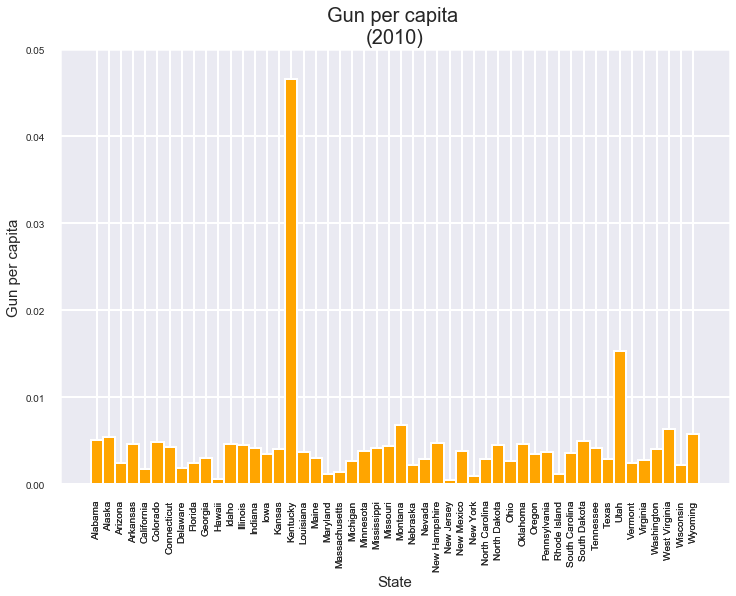

In [46]:
# Plot capita_2010 data
labels = [0.00, 0.01, 0.02, 0.03, 0.04, 0.05]
sns.set_context("poster")
sns.set_style('darkgrid')
plt.figure(figsize=(12, 8))

plt.bar(data_2010['state'], data_2010['capita_2010'], width=1, color='orange', align='center')
plt.xlabel('State', fontsize=15)
plt.ylabel('Gun per capita', fontsize=15)
plt.title('Gun per capita \n(2010)', fontsize=20)
plt.xticks(data['state'], rotation='vertical', fontsize=10)
plt.yticks(labels, fontsize=10)
    
plt.show()

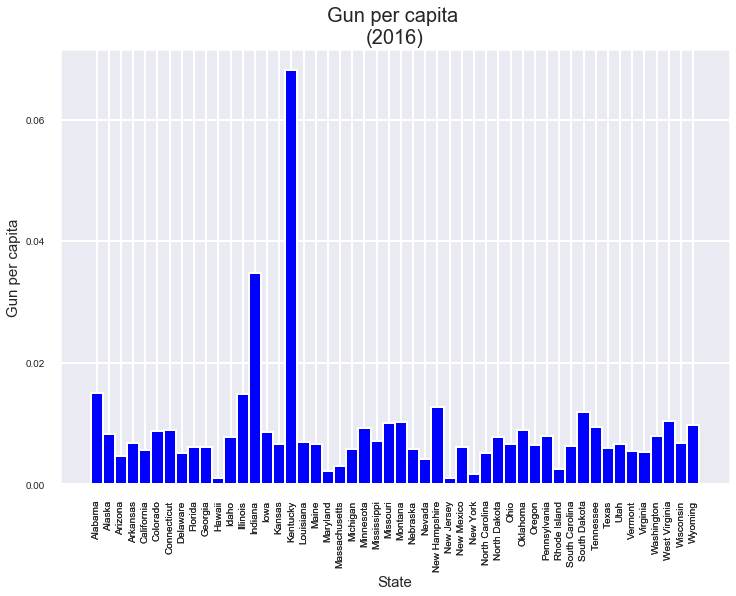

In [47]:
# Plot capita_2016 data
labels = [0.00, 0.02, 0.04, 0.06]
sns.set_context("poster")
sns.set_style('darkgrid')
ax = plt.figure(figsize=(12, 8))

plt.bar(data_2016['state'], data_2016['capita_2016'], width=1, color='blue', align='center')
plt.xlabel('State', fontsize=15)
plt.ylabel('Gun per capita', fontsize=15)
plt.title('Gun per capita \n(2016)', fontsize=20)
plt.xticks(data['state'], rotation='vertical', fontsize=10)
plt.yticks(labels, fontsize=10)
plt.show()

Bar plots are really useful for comparing values between different groups. A quick look at our bar plots gives us information about top 3 states with the highest gun per capita. **In 2010**, they are:
1. *Kentucky*
2. *Utah*
3. *Montana*

And top 3 states with the highest gun per capita **in 2016**:
1. *Kentucky*
2. *Indiana*
3. *Alabama*

### Research Question 2: Which states had the highest number of gun registrations (2010 vs 2016)?

To answer this question, we have to look at the `totals` column and sort its values in descending order which will give us what we're particularly interested in—top 5 states with the highest number of gun registrations.

In [48]:
# Look at which states had the highest number of gun registrations in 2010
top_2010 = data_2010.sort_values(by=['totals'], axis = 0, ascending = False).head(10)
top_2010

,month,state,handgun,long_gun,other,multiple,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,totals,population_2010,capita_2010
16,2010-01-01,Kentucky,7133.0,7283.0,107.0,531,6.0,11.0,0.0,1324.0,2080.0,1.0,201899,4339344.0,0.046528
42,2010-01-01,Texas,27645.0,26553.0,746.0,1527,55.0,38.0,0.0,4520.0,5213.0,3.0,73787,25146100.0,0.002934
4,2010-01-01,California,18280.0,20059.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,63048,37254522.0,0.001692
12,2010-01-01,Illinois,8799.0,9303.0,0.0,464,0.0,0.0,0.0,0.0,0.0,0.0,58343,12831574.0,0.004547
37,2010-01-01,Pennsylvania,0.0,47194.0,0.0,95,0.0,0.0,0.0,0.0,0.0,0.0,47456,12702857.0,0.003736
8,2010-01-01,Florida,27038.0,15924.0,0.0,1303,46.0,18.0,0.0,997.0,671.0,2.0,46404,18804592.0,0.002468
43,2010-01-01,Utah,2356.0,2824.0,0.0,114,0.0,0.0,0.0,0.0,0.0,0.0,42200,2763888.0,0.015268
34,2010-01-01,Ohio,16178.0,11272.0,435.0,669,20.0,77.0,0.0,753.0,944.0,0.0,30348,11536727.0,0.002631
9,2010-01-01,Georgia,8603.0,7074.0,123.0,403,9.0,35.0,0.0,1282.0,1807.0,0.0,29217,9688680.0,0.003016
32,2010-01-01,North Carolina,230.0,9770.0,165.0,178,17.0,24.0,0.0,1454.0,2341.0,4.0,27260,9535688.0,0.002859


Top 5 states with the highest number of gun registrations in 2010:
1. Kentucky
2. Texas
3. California
4. Illinois
5. Pennsylvania

In [49]:
# Look at which states had the highest number of gun registration in 2016
top_2016 = data_2016.sort_values(by=['totals'], axis = 0, ascending = False).head(10)
top_2016

,month,state,handgun,long_gun,other,multiple,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,totals,population_2016,capita_2016
66,2016-01-01,Kentucky,13847.0,7713.0,403.0,416,11.0,6.0,0.0,1294.0,1242.0,1.0,302383,4436974.0,0.068151
63,2016-01-01,Indiana,29653.0,14356.0,1871.0,939,4.0,4.0,1.0,38.0,416.0,9.0,230892,6633053.0,0.034809
54,2016-01-01,California,52139.0,32970.0,7054.0,0,0.0,0.0,0.0,530.0,497.0,7.0,220912,39250017.0,0.005628
62,2016-01-01,Illinois,32112.0,12869.0,0.0,813,0.0,0.0,0.0,0.0,0.0,0.0,189400,12801539.0,0.014795
92,2016-01-01,Texas,72626.0,38396.0,3756.0,2700,44.0,27.0,2.0,5970.0,4185.0,30.0,164088,27862596.0,0.005889
58,2016-01-01,Florida,62085.0,26356.0,3480.0,2036,13.0,6.0,0.0,2368.0,984.0,5.0,125935,20612439.0,0.006110
87,2016-01-01,Pennsylvania,57355.0,10224.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,102170,12784227.0,0.007992
84,2016-01-01,Ohio,38028.0,18613.0,2460.0,1322,18.0,11.0,1.0,1187.0,680.0,14.0,76218,11614373.0,0.006562
50,2016-01-01,Alabama,25445.0,14785.0,1266.0,884,8.0,17.0,0.0,1978.0,1554.0,5.0,73218,4863300.0,0.015055
91,2016-01-01,Tennessee,30411.0,16571.0,0.0,1271,0.0,0.0,0.0,0.0,0.0,0.0,62789,6651194.0,0.009440


Top 5 states with the highest number of gun registrations in 2016:
1. Kentucky
2. Indiana
3. California
4. Illinois
5. Texas

Let's visualize it in a stacked bar chart for better comparison between 2010 and 2016 statistics.

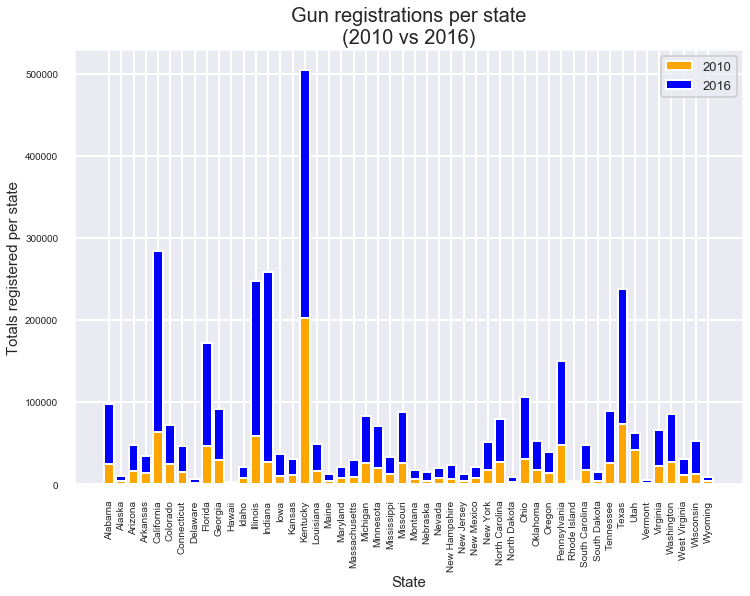

In [50]:
labels = data_2010.state
labels_totals = [0, 5000, 10000, 15000, 20000, 25000, 30000]
sns.set_context('poster')
sns.set_style('darkgrid')
plt.figure(figsize=(12, 8))
plt.title('Gun registrations per state\n(2010 vs 2016)', fontsize=20)
plt.bar(labels, data_2010['totals'], color='orange')
plt.bar(labels, data_2016['totals'], bottom=data_2010['totals'], color='blue')
plt.xlabel('State', fontsize=15)
plt.ylabel('Totals registered per state', fontsize=15)
plt.xticks(labels, rotation='vertical', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(['2010', '2016'], loc='upper right', fontsize=13)

plt.show()

### Research Question 3: Which states have had the highest growth in gun registrations over the period of 2010 to 2016?

To answer this question, let's visualize the total number of firearms registered in each state in 2010 and 2016. We'll use `data_2010` and `data_2016` for this. Plotting two line charts in one plot will help us visually compare the totals and see where which states have had the highest growth in gun registrations.

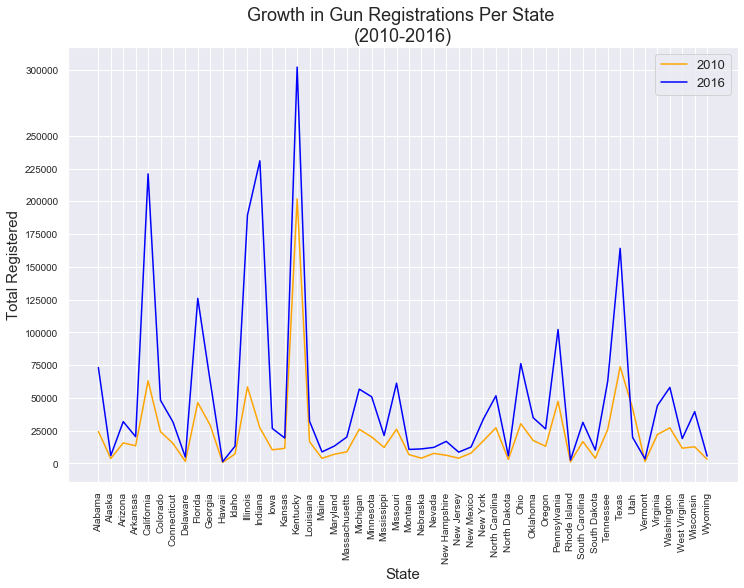

In [51]:
totals = [0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, 225000, 250000, 300000]
sns.set_context('notebook')
sns.set_style('darkgrid')
plt.figure(figsize=(12, 8))
plt.plot(data_2010.state, data_2010.totals, color='orange')
plt.plot(data_2016.state, data_2016.totals, color='blue')
plt.title('Growth in Gun Registrations Per State \n(2010-2016)', fontsize=18)
plt.xlabel('State', fontsize=15)
plt.ylabel('Total Registered', fontsize=15)
plt.xticks(data_2010.state, rotation='vertical', fontsize=10)
plt.yticks(totals, fontsize=10)
plt.legend(('2010', '2016'), loc='upper right', fontsize=13)
plt.show()

The line charts make it visually clear that 
* California, 
* Illinois, 
* Indiana, 
* and Texas 

have had the *highest growth* in number of guns registered over the period of 2010 to 2016.

## Conclusions

### Results
In this project, we analyzed data from the FBI's National Instant Criminal Background Check System in order to find answers to the following questions:

**What is the estimated number of gun registration per capita by states (2010 vs 2016)?**\
Based on the statistic we calculated, top 3 states with the highest gun per capita for the year of 2010 are Kentucky, Utah, and Montana. According to the 2016 stats, Kentucky is at the top of the list again, followed by Indiana and Alabama.

**Which states had the highest number of gun registrations (2010 vs 2016)?**\
Top 5 states with the highest number of gun registrations:
1. Kentucky (also true for 2016 data)
2. Texas (vs Indiana in 2016)
3. California (also true for 2016 data)
4. Illinois (also true for 2016 data)
5. Pennsylvania (vs Texas in 2016)

**Which states have had the highest growth in gun registrations over the period of 2010 to 2016?**\
If we look at the line plots, we see that California, Illinois, Indiana, and Texas have had the highest growth in the number of firearms registered over the period of 2010 to 2016. However, we can't say what caused this growth based solely on data analysis and graphs. 

It seems like for the period 2010-2016 the overall trend is increasing number of total firearms registered across different states, but we don't have recent data to support this observation.

### Limitations
The data used in this analysis has a few limitations that need to be mentioned:
* We could not include records for a few US territories, because they were not present in both datasets, so we had to drop a few columns. They are: `['District of Columbia', 'Guam', 'Mariana Islands', 'Puerto Rico', 'Virgin Islands']`.
* We do not have the most recent data (2020-2021) to support the overall trend of increasing number of total firearms registered across different states.